In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Analytics Assignment - for Ashwin - Drop Report.csv")

In [3]:
df.shape

(980, 18)

In [4]:
df.head(3)

,SN,Lead ID,Cohort,Cohort start date (orientation),Month,Deposit paid,Attended Orientation (Yes/No),Attended Sorting (Yes/No),Sorting foundation material consumption,New or moved from prev cohort,Number of moves,Move/Drop,Timezone,Domain,Work Ex (years),Date when the lead entered the system,Date of enrollment webinar,Marketing channel
0,1,tif9416692,Early-October 2020,"October 1, 2020",October,9/4/2020,No,No,72,New,0,Retained,BST,Machine Learning/AI (including Deep Learning a...,4-7 years,NaN,NaN,NaN
1,2,22404867227,End-October 2020,"October 22, 2020",October,10/15/2020,Yes,Yes,100,New,0,Retained,CST,"SRE (Including Technical Operations), \nNetwor...",10-15 years,07-28-2020 21:11:11,2020-10-15,Organic
2,3,57903210163,End-October 2020,"October 22, 2020",October,10/19/2020,Yes,Yes,73,New,0,Retained,CST,Machine Learning/AI (including Deep Learning a...,4-7 years,10-15-2020 22:43:25,2020-10-17,Google NB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   SN                                       980 non-null    int64 
 1   Lead ID                                  980 non-null    object
 2   Cohort                                   980 non-null    object
 3   Cohort start date (orientation)          980 non-null    object
 4   Month                                    980 non-null    object
 5   Deposit paid                             980 non-null    object
 6   Attended Orientation (Yes/No)            936 non-null    object
 7   Attended Sorting (Yes/No)                936 non-null    object
 8   Sorting foundation material consumption  936 non-null    object
 9   New or moved from prev cohort            980 non-null    object
 10  Number of moves                          980 non-null    int64

In [6]:
df.describe()

,SN,Number of moves
count,980.000000,980.000000
mean,490.500000,0.277551
std,283.045933,0.573955
min,1.000000,0.000000
25%,245.750000,0.000000
50%,490.500000,0.000000
75%,735.250000,0.000000
max,980.000000,4.000000


In [7]:
df.duplicated().sum()

0

In [8]:
s1 = df.isnull().sum()/df.shape[0] * 100
s2 = df.isnull().sum()
s3 = {'Percentage':s1, 'Values':s2}
df_na = pd.DataFrame(data=s3)
df_na

,Percentage,Values
SN,0.000000,0
Lead ID,0.000000,0
Cohort,0.000000,0
Cohort start date (orientation),0.000000,0
Month,0.000000,0
Deposit paid,0.000000,0
Attended Orientation (Yes/No),4.489796,44
Attended Sorting (Yes/No),4.489796,44
Sorting foundation material consumption,4.489796,44
New or moved from prev cohort,0.000000,0


In [9]:
df1 = df.copy()

## EDA

<b>1. Target Column 'Retained'</b>

In [10]:
df1['Status'] = df1['Move/Drop']

In [11]:
df1['Status'].value_counts()

Retained    694
Move        152
Drop        134
Name: Status, dtype: int64

In [12]:
df1.drop('Move/Drop', axis=1, inplace=True)

In [13]:
df1['Status'].unique()

array(['Retained', 'Drop', 'Move'], dtype=object)

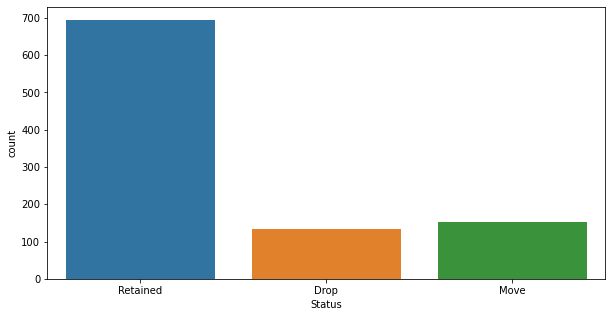

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Status'])

<b>2. 'Month' wise analysis</b>

In [15]:
df1['Month'].unique()

array(['October', 'September', 'August', 'July'], dtype=object)

In [16]:
df1['Month'].value_counts()/df1.shape[0]

August       0.297959
September    0.285714
October      0.269388
July         0.146939
Name: Month, dtype: float64

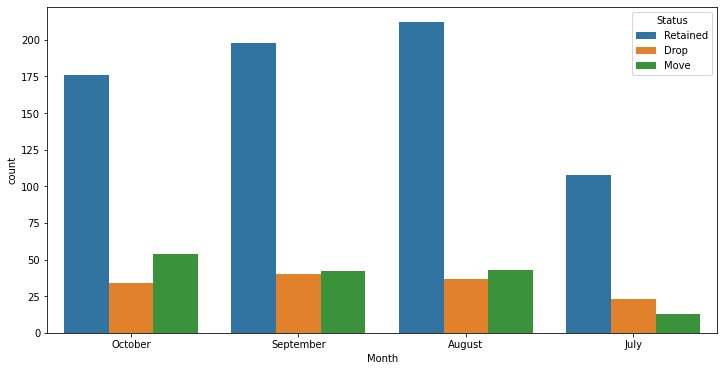

In [17]:
plt.figure(figsize=(12,6))
sns.countplot('Month',hue='Status', data=df1)

<b>3. Orientation and Sorting</b>

In [18]:
df1['Attended Orientation (Yes/No)'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df1['Attended Orientation (Yes/No)'].value_counts()

Yes    819
No     117
Name: Attended Orientation (Yes/No), dtype: int64

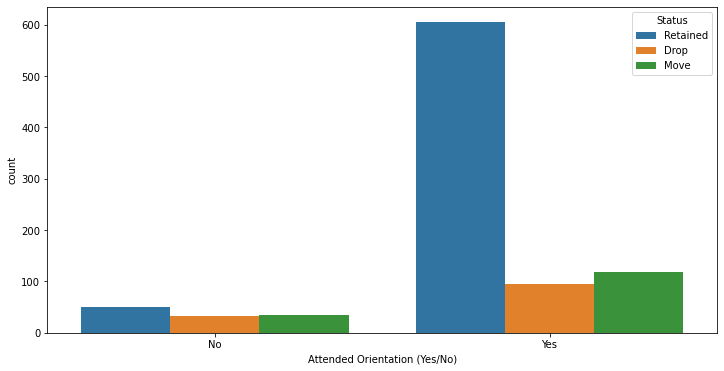

In [20]:
plt.figure(figsize=(12,6))

sns.countplot('Attended Orientation (Yes/No)', hue='Status', data = df1)

In [21]:
df1['Attended Sorting (Yes/No)'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
df1['Attended Sorting (Yes/No)'].value_counts()

Yes    778
No     158
Name: Attended Sorting (Yes/No), dtype: int64

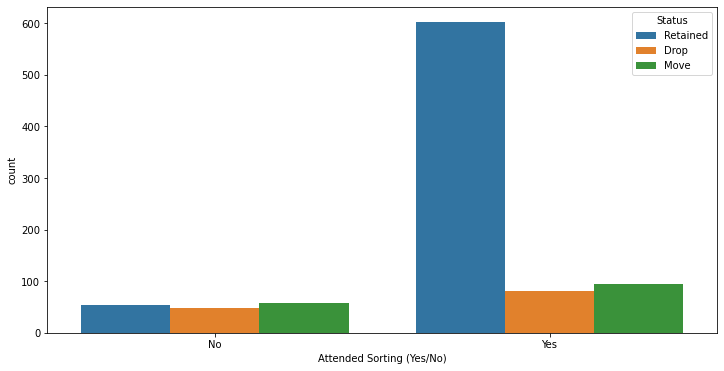

In [23]:
plt.figure(figsize=(12,6))
sns.countplot('Attended Sorting (Yes/No)', hue='Status', data = df1)

<b>4. 'Sorting foundation material consumption'</b>

In [24]:
df1['Sorting foundation material consumption'].value_counts()

100    349
0       88
-       68
94      37
72      23
      ... 
21       1
27       1
8        1
47       1
45       1
Name: Sorting foundation material consumption, Length: 94, dtype: int64

In [25]:
df1['Sorting foundation material consumption'].to_list()

['72',
 '100',
 '73',
 '25',
 '17',
 '100',
 '13',
 '71',
 '6',
 '13',
 '100',
 '73',
 '76',
 nan,
 '0',
 '0',
 '72',
 '0',
 '100',
 '1',
 '30',
 '0',
 '100',
 '100',
 '0',
 '100',
 '100',
 '0',
 '84',
 '100',
 '100',
 '70',
 '43',
 '100',
 '61',
 '50',
 '38',
 '100',
 '100',
 '6',
 '100',
 '-',
 '-',
 nan,
 nan,
 '100',
 '78',
 '17',
 '11',
 '100',
 '100',
 '61',
 '-',
 '100',
 '-',
 '-',
 '100',
 '62',
 '100',
 '55',
 '100',
 '100',
 '96',
 '100',
 '-',
 '100',
 '100',
 '99',
 '100',
 '100',
 '64',
 '100',
 '100',
 '100',
 '82',
 '98',
 '100',
 '38',
 '100',
 nan,
 nan,
 '-',
 '-',
 '-',
 '-',
 '-',
 '69',
 '100',
 '38',
 '75',
 '100',
 '100',
 '100',
 '97',
 '100',
 '62',
 '-',
 '0',
 '11',
 '-',
 nan,
 '65',
 '80',
 '53',
 '100',
 '100',
 '100',
 '100',
 '100',
 '92',
 '6',
 '89',
 '72',
 '0',
 '69',
 '1',
 '25',
 '100',
 '72',
 '61',
 '66',
 '100',
 '100',
 '34',
 '7',
 '56',
 '94',
 '83',
 '94',
 '100',
 '56',
 '12',
 '100',
 '89',
 '89',
 '100',
 '100',
 '78',
 '72',
 '97',
 '64

In [26]:
df1['Sorting foundation material consumption'].mode()

0    100
dtype: object

In [27]:
df1['Sorting foundation material consumption'] = df1['Sorting foundation material consumption'].fillna(100)

In [28]:
df1['Sorting foundation material consumption'] = df1['Sorting foundation material consumption'].replace('-', '100')

In [29]:
df1['Sorting foundation material consumption'] = df1['Sorting foundation material consumption'].astype('int')

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   SN                                       980 non-null    int64 
 1   Lead ID                                  980 non-null    object
 2   Cohort                                   980 non-null    object
 3   Cohort start date (orientation)          980 non-null    object
 4   Month                                    980 non-null    object
 5   Deposit paid                             980 non-null    object
 6   Attended Orientation (Yes/No)            936 non-null    object
 7   Attended Sorting (Yes/No)                936 non-null    object
 8   Sorting foundation material consumption  980 non-null    int32 
 9   New or moved from prev cohort            980 non-null    object
 10  Number of moves                          980 non-null    int64

(array([111.,  39.,  35.,  30.,  11.,  39.,  43.,  65.,  51., 556.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

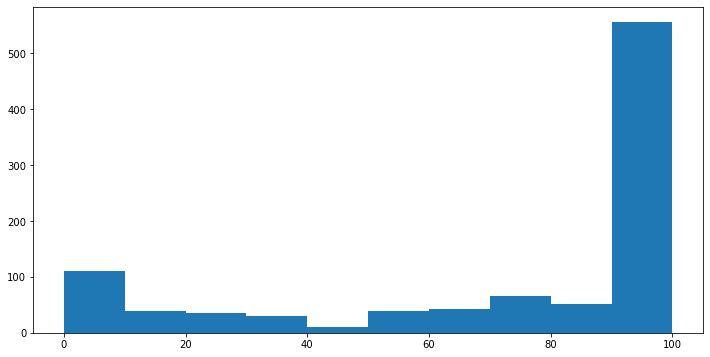

In [31]:
plt.figure(figsize=(12,6))
plt.hist(df1['Sorting foundation material consumption'])

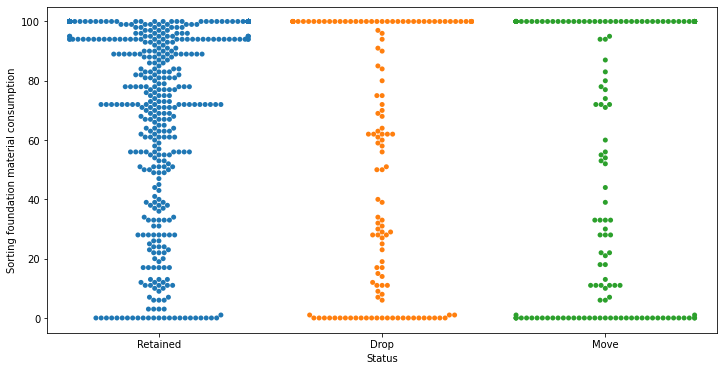

In [32]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Status', y='Sorting foundation material consumption', data=df1 )

<b>5. Moves from previous cohort and Number of moves</b>

In [33]:
df1['New or moved from prev cohort'].value_counts()

New                       758
Moved from prev cohort    222
Name: New or moved from prev cohort, dtype: int64

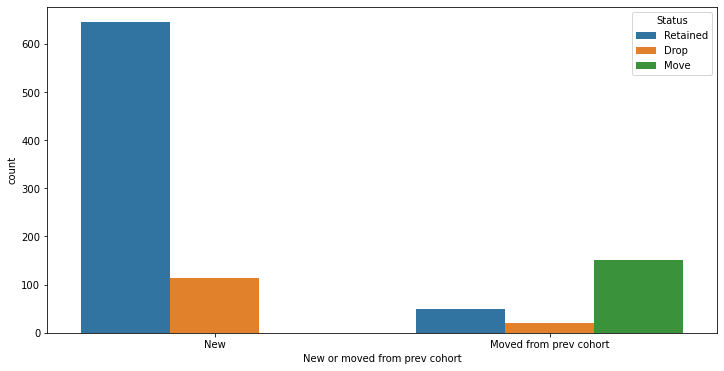

In [34]:
plt.figure(figsize=(12,6))
sns.countplot('New or moved from prev cohort', hue='Status', data=df1)

<b>6. Timezone</b>

In [35]:
df1['Timezone'].value_counts()

PST        587
EST        255
CST        100
MST         26
IST          8
HAST         1
UTC+8        1
BST          1
UK Time      1
Name: Timezone, dtype: int64

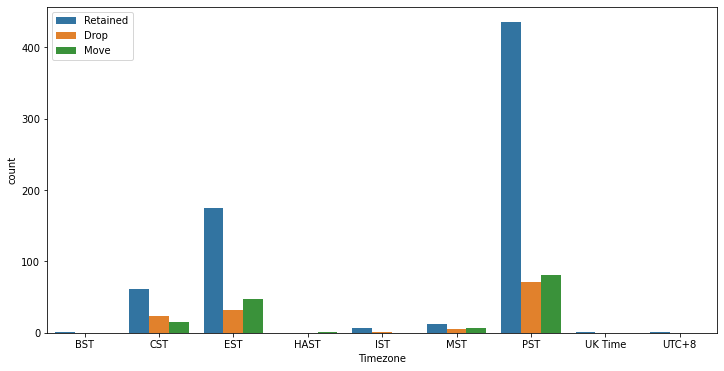

In [36]:
plt.figure(figsize=(12,6))
sns.countplot('Timezone', hue='Status', data=df1)
plt.legend(loc=2)

<b>7. Work Experience</b>

In [37]:
df1['Work Ex (years)'].value_counts()

10-15 years                                      192
4-7 years                                        139
7-10 years                                       117
15-20 years                                      111
1-3 years                                        101
20+ years                                         44
I do not have software engineering experience     18
Internships only                                  17
Name: Work Ex (years), dtype: int64

In [38]:
# df1['Work Ex (years)'] = df['Work Ex (years)'].map({'4-7 years': }) 

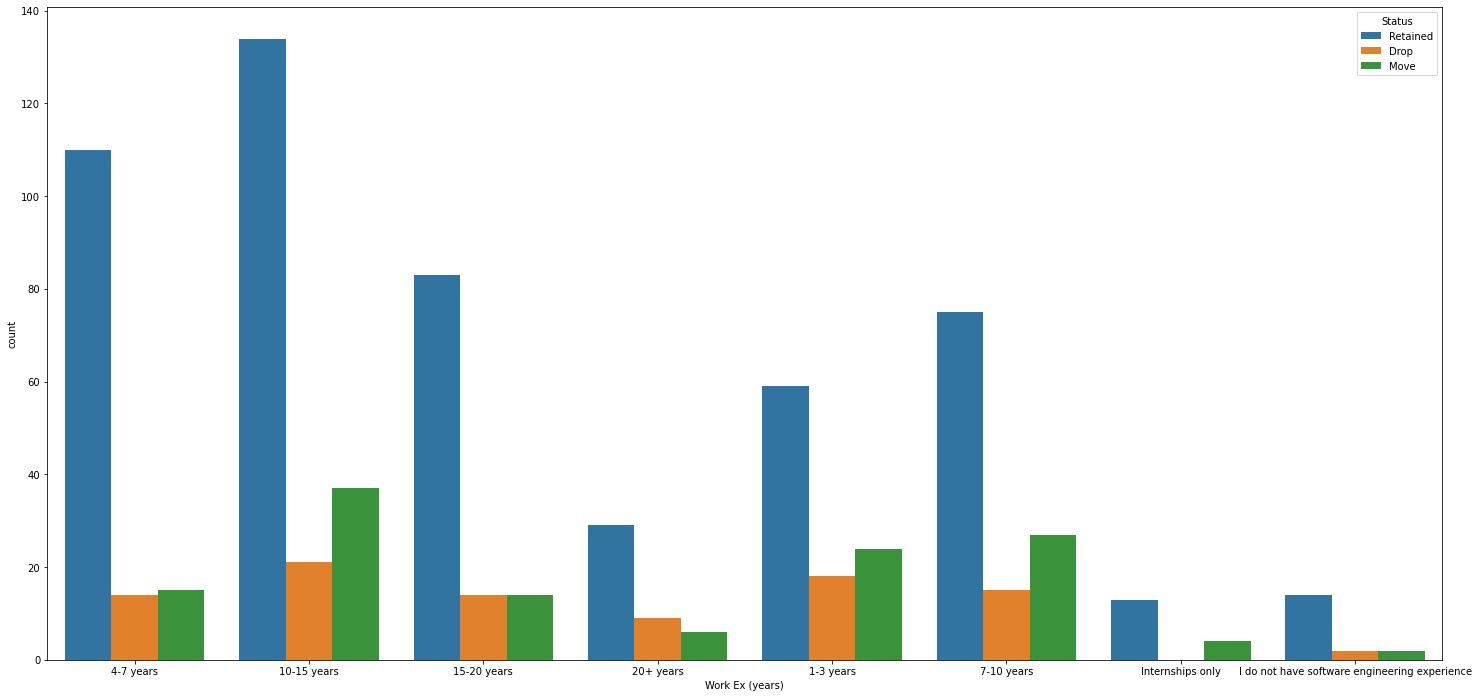

In [39]:
plt.figure(figsize=(25,12))
sns.countplot('Work Ex (years)', hue='Status', data=df1)

<b>8. Marketing Channel</b>

In [40]:
df1['Marketing channel'].value_counts()

Organic               453
Google Discovery       76
Google Brand           69
quora                  50
Google NB              46
Google YouTube         34
blind                  25
Google Remarketing     14
facebook                5
sendinblue              2
Name: Marketing channel, dtype: int64

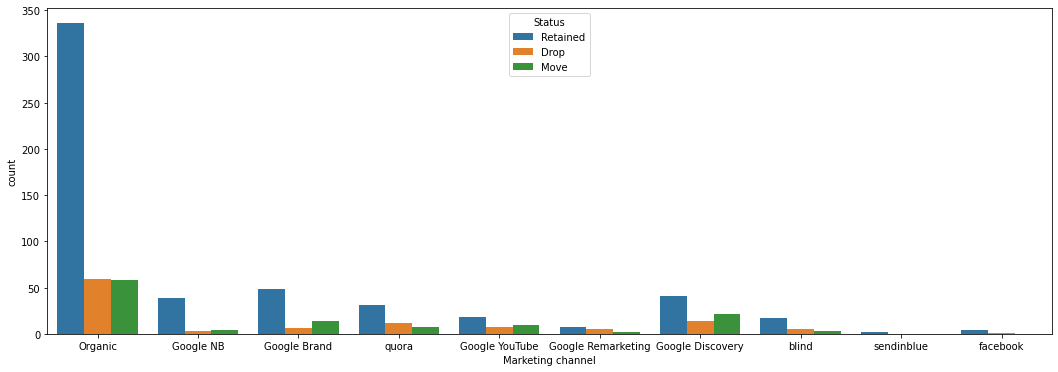

In [41]:
plt.figure(figsize=(18,6))
sns.countplot('Marketing channel', hue='Status', data=df1)

<b>9. Domain</b>

In [42]:
df1['Domain_Broad'] = df1['Domain'].str.split('(', expand=True)[0]

In [43]:
df1['Domain_Broad'] = df1['Domain_Broad'].str.split(',', expand=True)[0]

In [44]:
df1['Domain_Broad'].value_counts()

Backend                    128
Machine Learning/AI         71
Fullstack                   26
Frontend                    20
Data Engineering            12
Engineering Management      11
Networking                  10
Embedded Systems             8
Test Automation              7
SRE                          6
Product Manager              2
iOS                          1
choice 16                    1
Name: Domain_Broad, dtype: int64

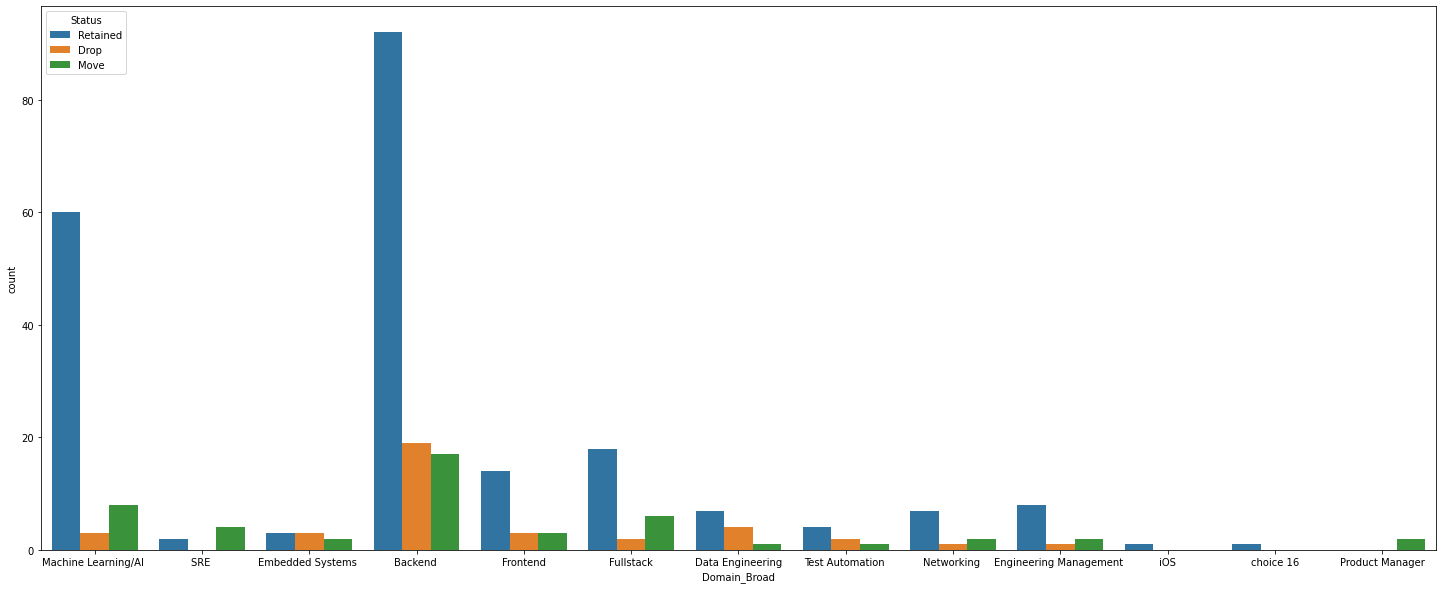

In [45]:
plt.figure(figsize=(25,10))
sns.countplot('Domain_Broad', hue='Status', data=df1)

<b>10. New or Moved from previous Cohort</b>

In [46]:
df1['New or moved from prev cohort'].value_counts()

New                       758
Moved from prev cohort    222
Name: New or moved from prev cohort, dtype: int64

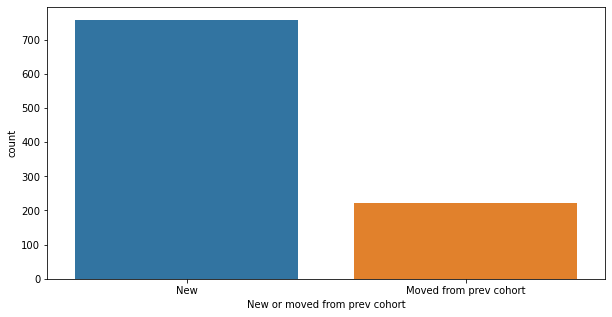

In [47]:
plt.figure(figsize=(10,5))
sns.countplot('New or moved from prev cohort', data=df1)

In [48]:
df1['Number of moves'].value_counts()

0    758
1    181
2     36
4      4
3      1
Name: Number of moves, dtype: int64

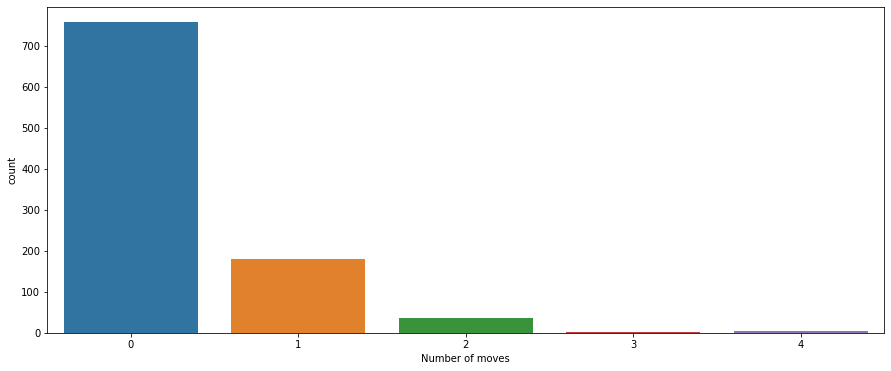

In [49]:
plt.figure(figsize=(15,6))
sns.countplot('Number of moves', data=df1)

In [50]:
df1.drop(['SN','Lead ID','Cohort','Cohort start date (orientation)','Deposit paid','New or moved from prev cohort',
          'Domain','Number of moves','Date when the lead entered the system','Date of enrollment webinar'], 
          axis=1, inplace=True)

In [51]:
df1.drop(['Month', 'Domain_Broad'], axis=1, inplace=True)

In [52]:
df1.head()

,Attended Orientation (Yes/No),Attended Sorting (Yes/No),Sorting foundation material consumption,Timezone,Work Ex (years),Marketing channel,Status
0,No,No,72,BST,4-7 years,NaN,Retained
1,Yes,Yes,100,CST,10-15 years,Organic,Retained
2,Yes,Yes,73,CST,4-7 years,Google NB,Retained
3,Yes,Yes,25,CST,10-15 years,Google Brand,Drop
4,Yes,Yes,17,CST,10-15 years,Organic,Drop


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Attended Orientation (Yes/No)            936 non-null    object
 1   Attended Sorting (Yes/No)                936 non-null    object
 2   Sorting foundation material consumption  980 non-null    int32 
 3   Timezone                                 980 non-null    object
 4   Work Ex (years)                          739 non-null    object
 5   Marketing channel                        774 non-null    object
 6   Status                                   980 non-null    object
dtypes: int32(1), object(6)
memory usage: 49.9+ KB


In [54]:
df1.dropna(inplace=True)

## Encoding and Standardization

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
df1['Work Ex (years)'] = le.fit_transform(df1['Work Ex (years)'])

In [72]:
Atnd_Ornt = pd.get_dummies(df1['Attended Orientation (Yes/No)'])
type(Atnd_Ornt)

pandas.core.frame.DataFrame

In [79]:
Atnd_Sort = pd.get_dummies(df1['Attended Sorting (Yes/No)'])

In [77]:
Marketing_ch = pd.get_dummies(df1['Marketing channel'])

In [68]:
Timezone = pd.get_dummies(df1['Timezone'])

In [82]:
df2 = pd.concat([df1,Atnd_Ornt,Atnd_Sort,Marketing_ch,Timezone], axis=1)

In [88]:
df2.head()

,Sorting foundation material consumption,Work Ex (years),Status,No,Yes,No,Yes,Google Brand,Google Discovery,Google NB,...,blind,facebook,quora,sendinblue,CST,EST,IST,MST,PST,UK Time
1,100,1,Retained,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,73,4,Retained,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,25,1,Drop,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,17,1,Drop,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,100,2,Drop,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [84]:
df2.drop(['Attended Orientation (Yes/No)','Attended Sorting (Yes/No)','Timezone','Marketing channel'], axis=1,inplace=True)

## Data Split 

In [92]:
X = df2.drop('Status', axis=1)
y = df2['Status']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Standardization

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [96]:
X_train_scaled = sc.fit_transform(X_train)

In [97]:
X_test_scales = sc.transform(X_test)

## Model Building

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [99]:
predictions = rfc.predict(X_test)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        Drop       0.20      0.14      0.16        22
        Move       0.19      0.13      0.16        30
    Retained       0.73      0.83      0.78       127

    accuracy                           0.63       179
   macro avg       0.37      0.37      0.37       179
weighted avg       0.58      0.63      0.60       179



In [102]:
print(confusion_matrix(y_test,predictions))

[[  3   3  16]
 [  4   4  22]
 [  8  14 105]]


In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=600)

In [106]:
predictions_scl = rfc.predict(X_test_scales)

In [107]:
print(classification_report(y_test,predictions_scl))

              precision    recall  f1-score   support

        Drop       0.25      0.18      0.21        22
        Move       0.16      0.13      0.15        30
    Retained       0.73      0.80      0.76       127

    accuracy                           0.61       179
   macro avg       0.38      0.37      0.37       179
weighted avg       0.58      0.61      0.59       179



In [108]:
print(confusion_matrix(y_test,predictions_scl))

[[  4   3  15]
 [  4   4  22]
 [  8  18 101]]


In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [118]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

        Drop       0.33      0.14      0.19        22
        Move       0.43      0.10      0.16        30
    Retained       0.74      0.95      0.83       127

    accuracy                           0.71       179
   macro avg       0.50      0.40      0.40       179
weighted avg       0.64      0.71      0.64       179



## Leads for ROI Calculation

In [121]:
from datetime import datetime

In [123]:
df['Cohort start date (orientation)'] = pd.to_datetime(df['Cohort start date (orientation)'])

In [133]:
df2 = df[df['Cohort start date (orientation)'] >= '2020-10-01']

In [134]:
df2.shape

(264, 18)

In [135]:
df2['Move/Drop'].value_counts()

Retained    176
Move         54
Drop         34
Name: Move/Drop, dtype: int64

In [141]:
df2.groupby('Marketing channel')['Move/Drop'].value_counts()

Marketing channel   Move/Drop
Google Brand        Retained     14
                    Move          5
                    Drop          1
Google Discovery    Retained     11
                    Move          9
                    Drop          3
Google NB           Retained      5
                    Move          2
Google Remarketing  Retained      3
                    Drop          2
                    Move          1
Google YouTube      Retained      7
                    Move          3
                    Drop          2
Organic             Retained     88
                    Move         18
                    Drop         14
blind               Retained      4
                    Drop          1
                    Move          1
facebook            Retained      2
quora               Retained      9
                    Drop          3
                    Move          1
Name: Move/Drop, dtype: int64